In [212]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [213]:
df = pd.read_excel("volume usd.xlsx")
df.index = pd.to_datetime(df['Date'])
df = df['Volume']
df = pd.DataFrame(df)

In [326]:
df2 = df[1:]

In [337]:
fit1 = ExponentialSmoothing(df2, seasonal_periods=4, trend='add', seasonal='add',damped=True).fit(use_boxcox=True)
pred = fit1.forecast(13).rename("Holt-Winter Additive Damped")
fit2 = ExponentialSmoothing(df2, seasonal_periods=4, trend = 'add', seasonal='add').fit(use_boxcox=True)

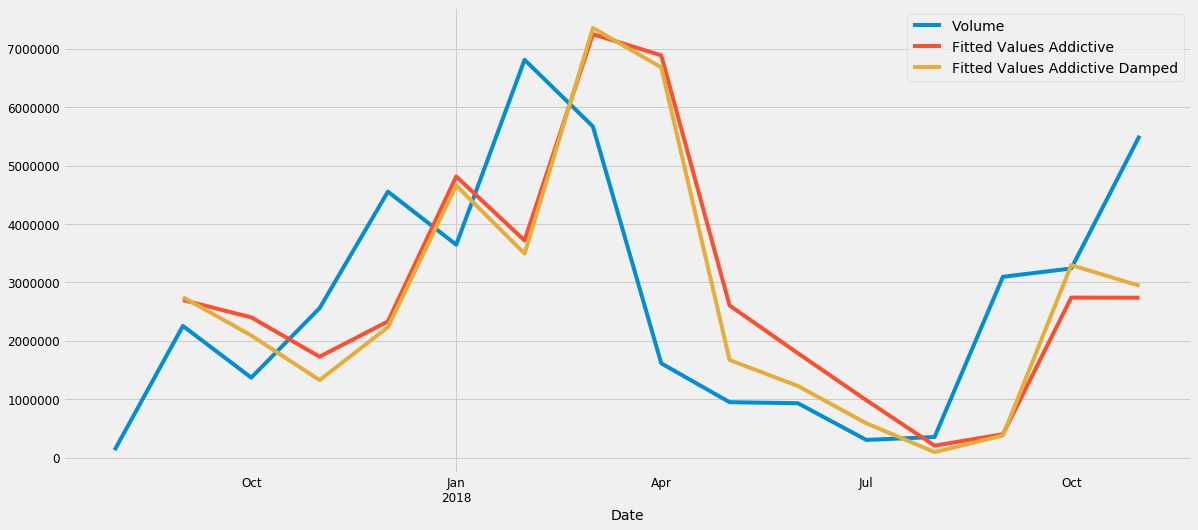

In [340]:
pred2 = fit2.forecast(13).rename("Holt-Winter Additive")
test = fit2.fittedvalues.rename("Fitted Values Addictive")
test2 = fit1.fittedvalues.rename("Fitted Values Addictive Damped")
df.plot(legend=True)
test.plot(legend=True)
test2.plot(legend=True)
plt.show()

In [314]:
sse = fit1.sse
len(fit1.fittedvalues)
np.sqrt(sse/16)

2139639.8088504816

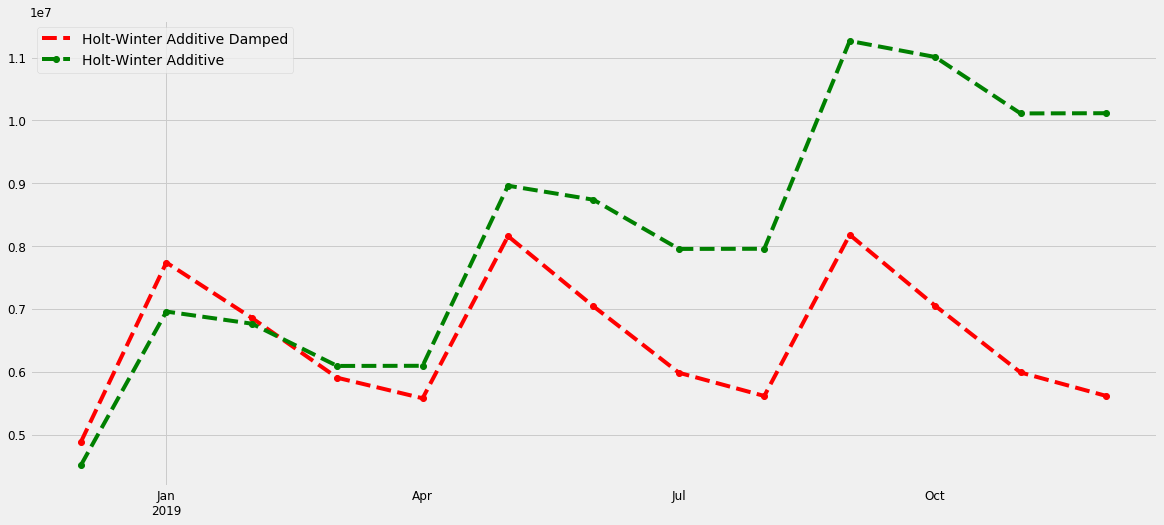

In [335]:
predplot = pred.plot(style='--', marker='o', color='red', legend=True)
predplot2 = pred2.plot(style='--', marker='o', color='green', legend=True)

In [354]:
forecast = pd.DataFrame([pred, pred2])
forecast

,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
Holt-Winter Additive Damped,4.886586e+06,7.739277e+06,6.858509e+06,5.906503e+06,5.579963e+06,8.158912e+06,7.042565e+06,5.986209e+06,5.616456e+06,8.180478e+06,7.051949e+06,5.990257e+06,5.618306e+06
Holt-Winter Additive,4.516837e+06,6.959174e+06,6.766709e+06,6.094183e+06,6.096635e+06,8.961531e+06,8.738361e+06,7.955492e+06,7.958356e+06,1.126424e+07,1.100913e+07,1.011133e+07,1.011463e+07


In [386]:
pred = pd.DataFrame(pred)
pred2 = pd.DataFrame(pred2)
forecast = pred.join(pred2)
results = pd.concat([forecast,df])
final = results.join([test,test2]).sort_index()
final.to_csv('Forecast.csv')